<a href="https://colab.research.google.com/github/Jaime-Simoes/TM_Project1/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Data Exploration (1st step guidelines)


In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
import nltk
import re

In [129]:
# Load the datasets

train_df = pd.read_excel("train.xlsx")
train_reviews_df = pd.read_excel("train_reviews.xlsx")

test_df = pd.read_excel("test.xlsx")
test_reviews_df = pd.read_excel("test_reviews.xlsx")

In [130]:
train_df.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [131]:
train_df.shape

(6248, 4)

In [132]:
train_reviews_df.head()

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [133]:
train_reviews_df.shape

(361281, 2)

In [134]:
test_df.head()

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [135]:
test_df.shape

(695, 3)

In [136]:
test_reviews_df.head()

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


In [137]:
test_reviews_df.shape

(41866, 2)

In [138]:
index_values_train_df = train_df['index'].value_counts()
print(index_values_train_df)

# Each index (Airbnb location) appears once
# goes from 1 to 6248

index
1       1
4150    1
4172    1
4171    1
4170    1
       ..
2081    1
2080    1
2079    1
2078    1
6248    1
Name: count, Length: 6248, dtype: int64


In [139]:
index_values_train_reviews_df = train_reviews_df['index'].value_counts()
print(index_values_train_reviews_df)

# Different amount of reviews per place

index
265     891
3396    765
1147    678
4106    617
954     583
       ... 
6092      1
376       1
4480      1
1759      1
6139      1
Name: count, Length: 4245, dtype: int64


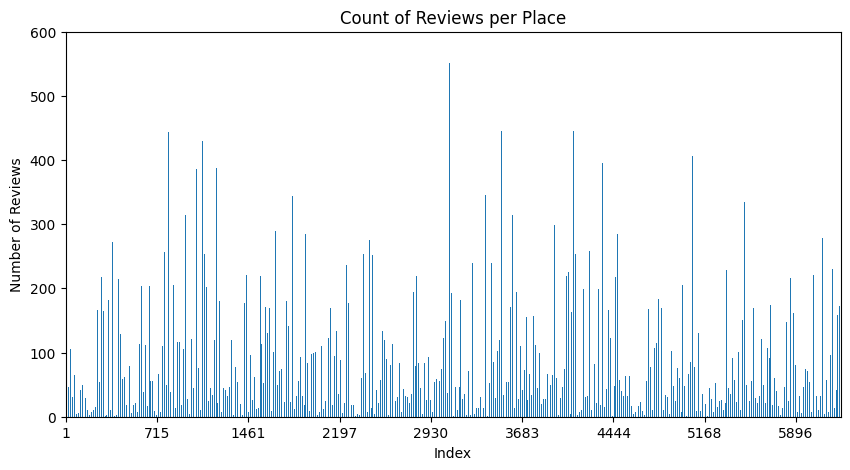

In [140]:
# Get distribution of amount per each index

index_values_train_reviews_df = train_reviews_df['index'].value_counts()

sorted_index_values_train_reviews_df = index_values_train_reviews_df.sort_index()
plt.figure(figsize=(10, 5))
sorted_index_values_train_reviews_df.plot(kind='bar')

plt.xticks(range(0, len(sorted_index_values_train_reviews_df), 500), rotation=0)
plt.ylim(0, 600)

plt.title('Count of Reviews per Place')
plt.xlabel('Index')
plt.ylabel('Number of Reviews')
plt.show()

In [141]:
# Get the places that don't have reviews

missing_indexes_train = set(range(1, 6249)) - set(index_values_train_reviews_df.index)
amount_missing = len(missing_indexes_train)      # amount of places with no review

print("Places that don't have reviews:", amount_missing)
print(missing_indexes_train)

Places that don't have reviews: 2003
{2, 3, 4, 6, 7, 13, 15, 17, 18, 21, 22, 28, 34, 41, 46, 48, 50, 52, 57, 60, 64, 67, 72, 74, 75, 77, 82, 84, 85, 87, 89, 92, 93, 94, 95, 96, 102, 103, 104, 108, 114, 115, 117, 118, 121, 125, 132, 135, 136, 138, 139, 143, 151, 157, 158, 160, 166, 170, 176, 178, 180, 186, 187, 189, 191, 200, 202, 206, 209, 213, 215, 216, 228, 231, 234, 236, 237, 239, 240, 252, 255, 256, 258, 260, 261, 263, 264, 266, 267, 268, 271, 276, 281, 284, 286, 288, 296, 297, 299, 302, 304, 306, 308, 316, 323, 324, 335, 343, 349, 362, 363, 364, 372, 379, 380, 383, 385, 387, 393, 397, 401, 402, 403, 410, 422, 434, 438, 443, 447, 450, 451, 455, 457, 460, 463, 469, 473, 476, 477, 478, 481, 482, 483, 485, 488, 489, 491, 492, 502, 506, 512, 513, 516, 522, 525, 533, 541, 543, 544, 546, 548, 556, 561, 562, 563, 571, 574, 580, 582, 587, 588, 594, 600, 605, 610, 615, 621, 625, 627, 628, 629, 630, 633, 635, 637, 638, 646, 647, 654, 655, 656, 657, 662, 666, 667, 669, 670, 676, 677, 678, 686

In [142]:
(amount_missing / 6248) * 100      # percentage of places with no reviews (very high)

# Do we delete these ones ?? Depends on test statistics. Let's see if we need to predict places in the test set that also don't have reviews
# in the test_reviews set. Because if so we also need to train the model for those instances. Can't change the test dataset!

32.058258642765686

In [143]:
index_values_test_df = test_df['index'].value_counts()
print(index_values_test_df)

# from 1 to 695

index
1      1
468    1
460    1
461    1
462    1
      ..
234    1
235    1
236    1
237    1
695    1
Name: count, Length: 695, dtype: int64


In [144]:
index_values_test_reviews_df = test_reviews_df['index'].value_counts()
print(index_values_test_reviews_df)

# Different amount of reviews per place

index
160    649
129    571
435    522
418    489
387    461
      ... 
138      1
141      1
38       1
83       1
453      1
Name: count, Length: 475, dtype: int64


In [145]:
# Get the places that don't have reviews

missing_indexes_test = set(range(1, 695)) - set(index_values_test_reviews_df.index)
amount_missing_test = len(missing_indexes_test)      # amount of places with no review

print("Places that don't have reviews:", amount_missing_test)
print(missing_indexes_test)

Places that don't have reviews: 220
{513, 514, 3, 521, 522, 11, 523, 13, 14, 526, 527, 18, 531, 22, 23, 536, 25, 26, 28, 29, 31, 545, 552, 553, 556, 557, 558, 47, 563, 569, 59, 61, 62, 63, 64, 575, 66, 577, 582, 583, 584, 585, 586, 587, 76, 591, 80, 82, 594, 595, 598, 87, 89, 90, 91, 602, 94, 96, 97, 98, 610, 612, 613, 102, 104, 105, 108, 620, 621, 111, 113, 115, 117, 629, 119, 631, 632, 122, 637, 638, 639, 641, 644, 133, 134, 136, 137, 650, 653, 143, 658, 659, 148, 660, 153, 154, 665, 156, 669, 159, 672, 677, 167, 168, 679, 680, 171, 682, 683, 684, 175, 180, 693, 183, 189, 190, 192, 199, 204, 206, 211, 212, 213, 215, 220, 227, 229, 234, 237, 240, 242, 243, 245, 248, 249, 251, 253, 258, 263, 269, 273, 274, 277, 285, 286, 289, 291, 292, 294, 297, 300, 305, 307, 312, 319, 320, 324, 325, 327, 330, 332, 336, 337, 338, 344, 345, 348, 350, 354, 356, 358, 366, 367, 369, 370, 373, 375, 381, 382, 384, 386, 388, 389, 390, 395, 396, 397, 400, 408, 409, 411, 412, 419, 422, 425, 432, 433, 441, 443,

In [146]:
(amount_missing_test / 695) * 100      # also high

31.654676258992804

In [147]:
# percentage of places that don't have reviews is the same for training and testing.
# because we can't change test set we need to also include in the model these situations
# so, not deleting these rows

# but feels very weird. like 1/3 of predictions is on 0 reviews. I don't know...

In [148]:
# Now let's merge both training sets into one df:

In [149]:
train_reviews_df['comments'] = train_reviews_df['comments'].astype(str)

# Group comments by index and join them with " ## "
comments_grouped = train_reviews_df.groupby('index')['comments'].apply(lambda x: ' '.join(x)).reset_index()

# Merge with train_df_cleaned
train_df = train_df.merge(comments_grouped, how='left', on='index')

In [150]:
train_df.head()

,index,description,host_about,unlisted,comments
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,NaN
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,NaN
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,NaN
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,Un très bel appartement avec une magnifique vu...


In [151]:
# Check if it's working properly

print(train_df["comments"][0])      # looks good

this is a very cozy and comfortable house to stay in.never worry about the safety and the host is very nice.very close to parque metro station.easy to find. good<br/> My first hostel experience, and all I have to say is it will be pretty hard to beat this place!_x000D_<br/>I booked a room for 6 people, and I ended up getting my own room (there's a locker for each person in the room as well) so I knew my belongings were safe since I was the only one with a key card for my room. There's a 5 euro deposit for the keycard, so don't lose it!_x000D_<br/>The bed was more comfortable than mine at home, and if you close the curtains & shades it tunes out any cars driving by._x000D_<br/>You can't ask for a better location, I could see the Parque metro station from my window (the hostel is on the first floor of a really pretty building). The metro was so convenient, it came every 4-5 minutes, or you could go to the many local cafes right outside, or just walk for about 15-20 minutes down the stree

In [152]:
print(train_df['comments'].isna().sum())       # checks out

2003


In [153]:
# We can also make the same merge for test datasets:

In [154]:
test_reviews_df['comments'] = test_reviews_df['comments'].astype(str)
test_comments_grouped = test_reviews_df.groupby('index')['comments'].apply(lambda x: ' '.join(x)).reset_index()
test_df = test_df.merge(test_comments_grouped, how='left', on='index')

In [155]:
test_df.head()

,index,description,host_about,comments
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Thank you very much Antonio ! All has been per...
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,"This is a beautiful, bright apartment in a mor..."
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ...",NaN
3,4,Charming Apartment Close to the Bay of Cascais...,:),Claudia was a great host. She met us at the t...
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...,La maison est exactement comme sur les photos....


In [156]:
print(test_df["comments"][0])

Thank you very much Antonio ! All has been perfect during our stay, and the appartment is perfectly located in your fabulous city. We would love to visit you again next time :)_x000D_<br/> Very nice appartment in the old town of Lissabon, quite central but still calm in a small lane. No traffic noises etc.! There was enough space for 6 people, everything was clean, kitchen full equipped. Nice contact with the owner. Recommended! When travelling we're looking for kids friendly places to stay, and Antonios place was such a place. It's spacious and well equipped._x000D_<br/>_x000D_<br/>He's friendly mother was at the apartment to greet us and she had made ready a baby bed, a high chair and bought cookies,fruit and buns. Very nice._x000D_<br/>_x000D_<br/>The apartment had a hint of damp smell upon arriving, but after we have had the heaters on for some time it disappeared. So stay in the apartment for more than 15 minuttes._x000D_<br/>_x000D_<br/>The neighborhood is nice and we found good 

In [157]:
print(test_df["comments"].isna().sum())      # checks out

220


In [158]:
# So now we have two datasets: "train_df" and "test_df"

In [159]:
print(train_df.isna().sum())

index             0
description       0
host_about        0
unlisted          0
comments       2003
dtype: int64


In [160]:
print(test_df.isna().sum())

index            0
description      0
host_about       0
comments       220
dtype: int64


In [161]:
# No more missing values. So now it's just more specific analysis

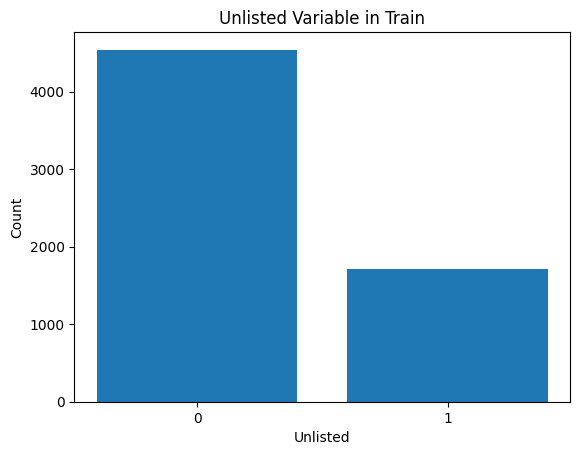

In [162]:
unlisted_counts = train_df['unlisted'].value_counts()


plt.bar(unlisted_counts.index, unlisted_counts.values)
plt.xlabel('Unlisted')
plt.ylabel('Count')
plt.title('Unlisted Variable in Train')
plt.xticks([0, 1])
plt.show()

##Analyzing train_df more in depth (following 1st practical class)

In [163]:
# Calculate word count for the "description" column
train_df['description_word_count'] = train_df['description'].apply(lambda x: len(str(x).split(" ")))

# Calculate word count for the "host_about" column
train_df['host_about_word_count'] = train_df['host_about'].apply(lambda x: len(str(x).split(" ")))

# Calculate word count for the "comments" column
train_df['comments_word_count'] = train_df['comments'].apply(lambda x: len(str(x).split(" ")))

In [164]:
train_df.head()

,index,description,host_about,unlisted,comments,description_word_count,host_about_word_count,comments_word_count
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...,127,4,1331
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,NaN,23,24,1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,NaN,170,45,1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,NaN,47,31,1
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,Un très bel appartement avec une magnifique vu...,101,37,1064


In [165]:
train_df.description_word_count.describe()

count    6248.000000
mean      132.860755
std        48.084904
min         3.000000
25%        99.000000
50%       157.000000
75%       167.000000
max       210.000000
Name: description_word_count, dtype: float64

In [166]:
train_df.host_about_word_count.describe()

count    6248.000000
mean       73.653009
std        79.660191
min         1.000000
25%        26.000000
50%        55.000000
75%       101.000000
max      1387.000000
Name: host_about_word_count, dtype: float64

In [167]:
train_df.comments_word_count.describe()

count     6248.000000
mean      2774.291773
std       4530.494404
min          1.000000
25%          1.000000
50%        787.000000
75%       3497.000000
max      46976.000000
Name: comments_word_count, dtype: float64

In [168]:
train_df['comments'] = train_df['comments'].fillna('')       # Na give problems bellow, convert to string type like this

test_df["comments"] = test_df["comments"].fillna('')

In [169]:
# Get most frequent 'words' for all three columns

description_words = ' '.join(train_df['description']).split()
description_freq = pd.Series(description_words).value_counts()
top_10_description_words = description_freq.head(10)

host_about_words = ' '.join(train_df['host_about']).split()
host_about_freq = pd.Series(host_about_words).value_counts()
top_10_host_about_words = host_about_freq.head(10)

comments_words = ' '.join(train_df['comments']).split()
comments_freq = pd.Series(comments_words).value_counts()
top_10_comments_words = comments_freq.head(10)

print("Top 10 most frequent words in the 'description' column:")
print(top_10_description_words)
print("\nTop 10 most frequent words in the 'host_about' column:")
print(top_10_host_about_words)
print("\nTop 10 most frequent words in the 'comments' column:")
print(top_10_comments_words)

Top 10 most frequent words in the 'description' column:
the      31323
and      27698
a        25540
/><br    17380
to       15328
of       15122
in       13866
with     13649
is       12083
de        6918
Name: count, dtype: int64

Top 10 most frequent words in the 'host_about' column:
and    16358
to     13291
the    10797
a      10535
in      9860
of      6524
I       6419
you     6248
de      4325
We      4206
Name: count, dtype: int64

Top 10 most frequent words in the 'comments' column:
and     553157
the     515963
a       398631
to      328675
is      258191
in      249469
was     239807
of      174087
very    156654
The     143987
Name: count, dtype: int64


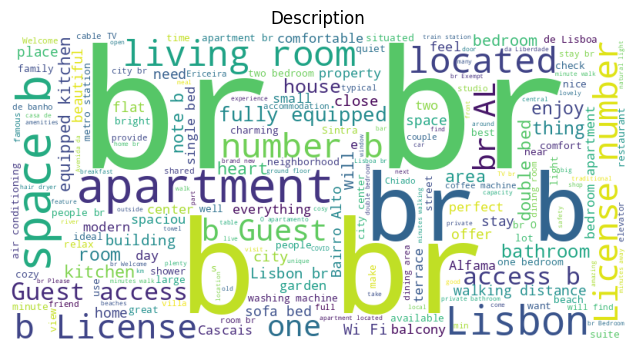

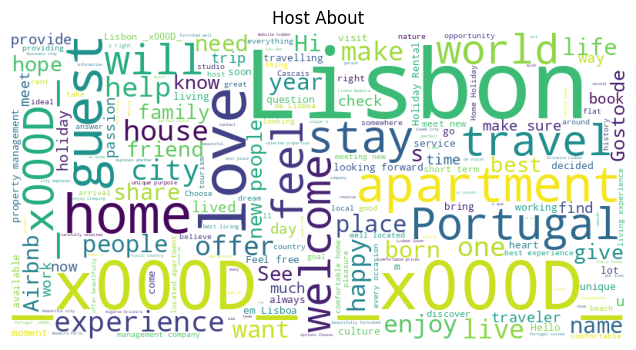

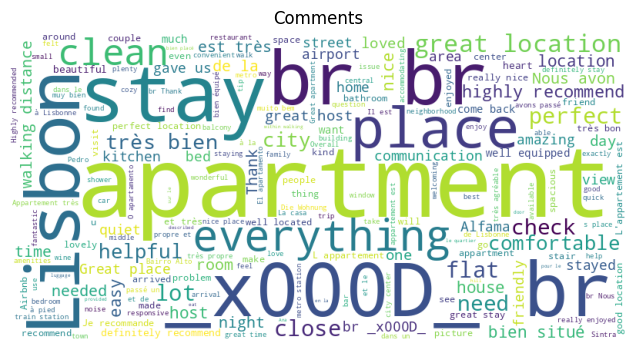

In [170]:
def wordcloud(column, title):

    text = ' '.join(column)

    # Create WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Plotting the word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

wordcloud(train_df['description'], 'Description')

wordcloud(train_df['host_about'], 'Host About')

wordcloud(train_df['comments'], 'Comments')

## Data Preprocessing (2nd step guidelines)

In [171]:
# Separating into list with each element being one word

train_df['description'] = train_df['description'].str.split()
train_df['host_about'] = train_df['host_about'].str.split()
train_df['comments'] = train_df['comments'].str.split()

In [172]:
train_df.head()

,index,description,host_about,unlisted,comments,description_word_count,host_about_word_count,comments_word_count
0,1,"[This, is, a, shared, mixed, room, in, our, ho...","[Alojamento, Local, Registro:, 20835/AL]",0,"[this, is, a, very, cozy, and, comfortable, ho...",127,4,1331
1,2,"[O, meu, espaço, fica, perto, de, Parque, Edua...","[I, am, friendly, host,, and, I, will, try, to...",1,[],23,24,1
2,3,"[Trafaria’s, House, is, a, cozy, and, familiar...","[I, am, a, social, person, liking, to, communi...",1,[],170,45,1
3,4,"[Apartamento, Charmoso, no, Chiado,, Entre, o,...","[Hello!_x000D_, I, m, Portuguese, and, i, love...",0,[],47,31,1
4,5,"[Joli, appartement, en, bordure, de, mer.<br, ...","[Nous, sommes, une, famille, avec, deux, enfan...",0,"[Un, très, bel, appartement, avec, une, magnif...",101,37,1064


In [173]:
# Doing the same for test set

test_df['description'] = test_df['description'].str.split()
test_df['host_about'] = test_df['host_about'].str.split()
test_df['comments'] = test_df['comments'].str.split()

In [174]:
test_df.head()

,index,description,host_about,comments
0,1,"[<b>The, space</b><br, />Apartment, located, i...","[Gosto, de, viajar,, de, conhecer, pessoas,, g...","[Thank, you, very, much, Antonio, !, All, has,..."
1,2,"[IMPORTANT:, In, response, to, COVID-19,, this...","[We, are, the, be@home, Team!, You, can, count...","[This, is, a, beautiful,, bright, apartment, i..."
2,3,"[Bright,, beautiful,, and, spacious., This, fo...","[Hi, there!, We're, GuestReady,, a, profession...",[]
3,4,"[Charming, Apartment, Close, to, the, Bay, of,...",[:)],"[Claudia, was, a, great, host., She, met, us, ..."
4,5,"[Se, procura, umas, férias, perto, da, praia,,...","[Bem, vindos, a, Portugal!_x000D_, Adoro, o, m...","[La, maison, est, exactement, comme, sur, les,..."


In [175]:
test_df["host_about"][0][0]

'Gosto'

In [176]:
# I think we could leave punctuation in

In [177]:
# Lowering cases for everything:      ( Making new dfs as a "save point" )

In [178]:
train_df_2 = train_df.copy()
test_df_2 = test_df.copy()

In [179]:
train_df_2['description'] = train_df_2['description'].apply(lambda x: [word.lower() for word in x])
train_df_2['host_about'] = train_df_2['host_about'].apply(lambda x: [word.lower() for word in x])
train_df_2['comments'] = train_df_2['comments'].apply(lambda x: [word.lower() for word in x])

train_df_2.head()

,index,description,host_about,unlisted,comments,description_word_count,host_about_word_count,comments_word_count
0,1,"[this, is, a, shared, mixed, room, in, our, ho...","[alojamento, local, registro:, 20835/al]",0,"[this, is, a, very, cozy, and, comfortable, ho...",127,4,1331
1,2,"[o, meu, espaço, fica, perto, de, parque, edua...","[i, am, friendly, host,, and, i, will, try, to...",1,[],23,24,1
2,3,"[trafaria’s, house, is, a, cozy, and, familiar...","[i, am, a, social, person, liking, to, communi...",1,[],170,45,1
3,4,"[apartamento, charmoso, no, chiado,, entre, o,...","[hello!_x000d_, i, m, portuguese, and, i, love...",0,[],47,31,1
4,5,"[joli, appartement, en, bordure, de, mer.<br, ...","[nous, sommes, une, famille, avec, deux, enfan...",0,"[un, très, bel, appartement, avec, une, magnif...",101,37,1064


In [181]:
test_df_2['description'] = test_df_2['description'].apply(lambda x: [word.lower() for word in x])
test_df_2['host_about'] = test_df_2['host_about'].apply(lambda x: [word.lower() for word in x])
test_df_2['comments'] = test_df_2['comments'].apply(lambda x: [word.lower() for word in x])

test_df_2.head()

,index,description,host_about,comments
0,1,"[<b>the, space</b><br, />apartment, located, i...","[gosto, de, viajar,, de, conhecer, pessoas,, g...","[thank, you, very, much, antonio, !, all, has,..."
1,2,"[important:, in, response, to, covid-19,, this...","[we, are, the, be@home, team!, you, can, count...","[this, is, a, beautiful,, bright, apartment, i..."
2,3,"[bright,, beautiful,, and, spacious., this, fo...","[hi, there!, we're, guestready,, a, profession...",[]
3,4,"[charming, apartment, close, to, the, bay, of,...",[:)],"[claudia, was, a, great, host., she, met, us, ..."
4,5,"[se, procura, umas, férias, perto, da, praia,,...","[bem, vindos, a, portugal!_x000d_, adoro, o, m...","[la, maison, est, exactement, comme, sur, les,..."


In [184]:
# Applying "Stop Words":      (We have different languages)